Name: M.Vineeth <br>
Batch: EB03 <br>
Roll No: E18CSE095 <br>

## sample code

In [1]:
import multiprocessing
print(multiprocessing.cpu_count())

2


In [2]:
import multiprocessing
import os
import time
import numpy

def task(args):
    print("PID =", os.getpid(), ", args =", args)
    return args

pool = multiprocessing.Pool(processes = 4)
result = pool.map(task, [[1,2,3,4],[5,6],[7],[8]])

print(result)

PID = 595 , args = [1, 2, 3, 4]
PID = 597 , args = [7]
PID = 598 , args = [8]
PID = 596 , args = [5, 6]
[[1, 2, 3, 4], [5, 6], [7], [8]]


**Q1) Primes in Powerset** Array X is with numbers [1,2,3,...N] with N = 25. Create a
power set Y (https://www.mathsisfun.com/sets/power-set.html). Find out list
Z of the subsets whose sum is a prime number. Z should be in the original order
of the Y. Implement this a) using serial operations with nested for loops, b) using
multiprocessing functionality to independently perform operations. Create
threads or multiple processes based on number of available CPU cores (use
built-in functions). Analyze different time taken for each of these
implementations by changing a) value of N, b) number of threads used
(2,3…no_of_available_cores).

## a) using serial operation

In [3]:
# generate all the subsets
def generate_subsets(arr, powerset):
    ind = 0
    for i in range(pow(2, len(arr))):
        j = 0
        temp = i
        subset = list()
        while(temp):
            if(temp & 1):
                subset.append(arr[j])
            j += 1
            temp = temp >> 1
        
        powerset.append(tuple(subset))                

In [4]:
# checking for prime
def isPrime(num):
    for i in range(2, num):
        if(num % i == 0):
            return False
    if(num != 1):
        return True
    return False

In [5]:
print(isPrime(18))
print(isPrime(37))
print(isPrime(1))

False
True
False


In [6]:
# select prime subsets
def prime_subsets(powerset, primeset):
    for s in powerset:
        if(isPrime(sum(s)) and sum(s) != 0):
            primeset.append(s)

In [7]:
# sample test case for n = 3

import numpy as np
import threading

n = 3
arr = np.arange(1, n + 1)
print(arr.shape)
print(arr)

powerset = list()

start = time.time()
generate_subsets(arr, powerset)
print("len of powerset: ", len(powerset))
print("powerset: \n", powerset)

primeset = list()

total_time = time.time() - start
prime_subsets(powerset, primeset)
print("len of primeset: ", len(primeset))
print("primeset: \n", primeset)
print("time taken: ", round(total_time, 5))

(3,)
[1 2 3]
len of powerset:  8
powerset: 
 [(), (1,), (2,), (1, 2), (3,), (1, 3), (2, 3), (1, 2, 3)]
len of primeset:  4
primeset: 
 [(2,), (1, 2), (3,), (2, 3)]
time taken:  0.00099


In [8]:
# n = 15
import numpy as np
import threading

n = 15
arr = np.arange(1, n + 1)
print(arr.shape)
print(arr)

powerset = list()

start = time.time()
generate_subsets(arr, powerset)
print("len of powerset: ", len(powerset))
print("powerset: \n", powerset)

primeset = list()
prime_subsets(powerset, primeset)

total_time = time.time() - start
print("len of primeset: ", len(primeset))
print("primeset: \n", primeset)
print("time taken: ", round(total_time, 5))

(15,)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
len of powerset:  32768
powerset: 
 [(), (1,), (2,), (1, 2), (3,), (1, 3), (2, 3), (1, 2, 3), (4,), (1, 4), (2, 4), (1, 2, 4), (3, 4), (1, 3, 4), (2, 3, 4), (1, 2, 3, 4), (5,), (1, 5), (2, 5), (1, 2, 5), (3, 5), (1, 3, 5), (2, 3, 5), (1, 2, 3, 5), (4, 5), (1, 4, 5), (2, 4, 5), (1, 2, 4, 5), (3, 4, 5), (1, 3, 4, 5), (2, 3, 4, 5), (1, 2, 3, 4, 5), (6,), (1, 6), (2, 6), (1, 2, 6), (3, 6), (1, 3, 6), (2, 3, 6), (1, 2, 3, 6), (4, 6), (1, 4, 6), (2, 4, 6), (1, 2, 4, 6), (3, 4, 6), (1, 3, 4, 6), (2, 3, 4, 6), (1, 2, 3, 4, 6), (5, 6), (1, 5, 6), (2, 5, 6), (1, 2, 5, 6), (3, 5, 6), (1, 3, 5, 6), (2, 3, 5, 6), (1, 2, 3, 5, 6), (4, 5, 6), (1, 4, 5, 6), (2, 4, 5, 6), (1, 2, 4, 5, 6), (3, 4, 5, 6), (1, 3, 4, 5, 6), (2, 3, 4, 5, 6), (1, 2, 3, 4, 5, 6), (7,), (1, 7), (2, 7), (1, 2, 7), (3, 7), (1, 3, 7), (2, 3, 7), (1, 2, 3, 7), (4, 7), (1, 4, 7), (2, 4, 7), (1, 2, 4, 7), (3, 4, 7), (1, 3, 4, 7), (2, 3, 4, 7), (1, 2, 3, 4, 7), (5, 7), (1, 5, 7), (2

In [9]:
for s in powerset[0 : 10]:
  print(s)

()
(1,)
(2,)
(1, 2)
(3,)
(1, 3)
(2, 3)
(1, 2, 3)
(4,)
(1, 4)


In [10]:
# simple usage of map function

def length(s):
  return len(s)

arr = ["apple", "banana", "orange"]
lens = map(length, arr)
print(lens)
print(list(lens))

[5, 6, 6]


## b) using multi-processing

In [11]:
# select prime subsets in the range [start, end]
#def prime_subsets(powerset, primeset):
def prime_subsets(powerset):
  subset = list()
  #for s in powerset:
  for s in args[0]:
      if(isPrime(sum(s)) and sum(s) != 0):
        subset.append(s)
  return subset
          

In [12]:
# n = 15
import numpy as np
import multiprocessing

n = 15
total_processes = 4
process = [None] * total_processes

arr = np.arange(1, n + 1)
print(arr.shape)
print(arr)

powerset = list()

start_time = time.time()
generate_subsets(arr, powerset)
print("len of powerset: ", len(powerset))
print("powerset: \n", powerset)

primeset = []
size = len(powerset)
start = 0
end = size // total_processes

# for i in range(total_processes):
#   process[i] = multiprocessing.Process(target = prime_subsets, args = (powerset, start, end, primeset))
#   process[i].start()
#   start = end + 1
#   end += size // total_processes

# for i in range(total_processes):
#   process[i].join()

args = list()
for i in range(total_processes):
  args.append(list(powerset[start : end]))
  start = end + 1
  end += size // total_processes

pool = multiprocessing.Pool(processes = total_processes)
result = pool.map(prime_subsets, args)

total_time = time.time() - start_time
print("len of primeset: ", len(result))
print("primeset: \n", list(result))
print("time taken: ", round(total_time, 5))

(15,)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
len of powerset:  32768
powerset: 
 [(), (1,), (2,), (1, 2), (3,), (1, 3), (2, 3), (1, 2, 3), (4,), (1, 4), (2, 4), (1, 2, 4), (3, 4), (1, 3, 4), (2, 3, 4), (1, 2, 3, 4), (5,), (1, 5), (2, 5), (1, 2, 5), (3, 5), (1, 3, 5), (2, 3, 5), (1, 2, 3, 5), (4, 5), (1, 4, 5), (2, 4, 5), (1, 2, 4, 5), (3, 4, 5), (1, 3, 4, 5), (2, 3, 4, 5), (1, 2, 3, 4, 5), (6,), (1, 6), (2, 6), (1, 2, 6), (3, 6), (1, 3, 6), (2, 3, 6), (1, 2, 3, 6), (4, 6), (1, 4, 6), (2, 4, 6), (1, 2, 4, 6), (3, 4, 6), (1, 3, 4, 6), (2, 3, 4, 6), (1, 2, 3, 4, 6), (5, 6), (1, 5, 6), (2, 5, 6), (1, 2, 5, 6), (3, 5, 6), (1, 3, 5, 6), (2, 3, 5, 6), (1, 2, 3, 5, 6), (4, 5, 6), (1, 4, 5, 6), (2, 4, 5, 6), (1, 2, 4, 5, 6), (3, 4, 5, 6), (1, 3, 4, 5, 6), (2, 3, 4, 5, 6), (1, 2, 3, 4, 5, 6), (7,), (1, 7), (2, 7), (1, 2, 7), (3, 7), (1, 3, 7), (2, 3, 7), (1, 2, 3, 7), (4, 7), (1, 4, 7), (2, 4, 7), (1, 2, 4, 7), (3, 4, 7), (1, 3, 4, 7), (2, 3, 4, 7), (1, 2, 3, 4, 7), (5, 7), (1, 5, 7), (2

**Q2) Word Search in English Dictionary:** Here is a text file containing over 466k English words https://raw.githubusercontent.com/dwyl/english-words/master/words.txt. Write a program to find list L of palindrome words. Elements of L should be in the original order of the dictionary. Implement the palindrome finder a) using serial linear search, b) using approach that divides given array and perform simultaneous search using threading/multiprocessing. Create threads or multiple processes based on number of available CPU cores (use built-in functions). Analyze different time taken for each of these implementations by changing number of threads used (2,3…no_of_available_cores).

In [13]:
!wget https://raw.githubusercontent.com/dwyl/english-words/master/words.txt

--2021-01-27 14:35:53--  https://raw.githubusercontent.com/dwyl/english-words/master/words.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4862992 (4.6M) [text/plain]
Saving to: ‘words.txt.1’

words.txt.1         100%[===================>]   4.64M  --.-KB/s    in 0.1s    

2021-01-27 14:35:53 (44.5 MB/s) - ‘words.txt.1’ saved [4862992/4862992]



In [14]:
# load the words from the text file

words = []
with open("words.txt", "r") as f:
  for line in f:
    for word in line.split():
      words.append(word)

print(len(words))
print("10 random words: ", words[1000:1010])


466550
10 random words:  ['aboundingly', 'abounds', 'Abourezk', 'about', 'about-face', 'about-faced', 'about-facing', 'abouts', 'about-ship', 'about-shipped']


## a) using serial operations

In [15]:
def isPalindrome(s):
  return s == s[::-1]

In [16]:
def count_palindromes(words):
  for word in words:
    if(isPalindrome(word)):
      palindromes.append(word)

In [17]:
%%time

palindromes = list()
start_time = time.time()
count_palindromes(words)
total_time = time.time() - start_time

print("total_time: ", total_time)
print("count of palindromes: ", len(palindromes))
print("palindromes: ", palindromes)

total_time:  0.10515666007995605
count of palindromes:  319
palindromes:  ['2', 'a', 'AA', 'AAA', 'AAAA', 'AAAAAA', 'ABA', 'acca', 'ADA', 'addda', 'AEA', 'AFA', 'affa', 'aga', 'AHA', 'AIA', 'AJA', 'AKA', 'ALA', 'alula', 'AMA', 'ana', 'AOA', 'APA', 'ARA', 'ASA', 'ATA', 'AUA', 'awa', 'B', 'B/B', 'BB', 'BBB', 'boob', 'C', 'CAC', 'CAMAC', 'CBC', 'CC', 'CCC', 'CDC', 'CEC', 'CFC', 'CIC', 'cyc', 'civic', 'CMC', 'CNC', 'COC', 'CPC', 'CRC', 'CSC', 'CTC', 'CTTC', 'CWC', 'D', 'DAD', 'DCD', 'DD', 'DDD', 'deed', 'deedeed', 'degged', 'deified', 'deked', 'deled', 'denned', 'dewed', 'DFD', 'DID', 'divid', 'DMD', 'DOD', 'DRD', 'DSD', 'dtd', 'E', 'ecce', 'ECE', 'ee', 'EEE', 'eye', 'eke', 'ELLE', 'eme', 'ene', 'EOE', 'ERE', 'ese', 'esse', 'ette', 'F', 'FF', 'FSF', 'G', 'GBG', 'GG', 'gig', 'goog', 'H', 'hagigah', 'hah', 'halalah', 'hallah', 'heh', 'HH', 'HIH', 'HRH', 'HSH', 'huh', 'i', 'y', '-i-', 'yay', 'yaray', 'ICI', 'IDI', 'ihi', 'ii', 'YY', 'iii', 'imi', 'immi', 'yoy', 'IPI', 'ISI', 'ISSI', 'J', 'JJ'

## b) using multi-processing

In [19]:
def count_palindromes(words):
  palindromes = list()
  for word in words:
    if(isPalindrome(word)):
      palindromes.append(word)
  
  return palindromes

In [21]:
args = list()
for i in range(total_processes):
  args.append(list(powerset[start : end]))
  start = end + 1
  end += size // total_processes

pool = multiprocessing.Pool(processes = total_processes)
result = pool.map(prime_subsets, args)

In [48]:
%%time

total_processes = 8
args = list()
size = len(words)
start = 0
end = size // total_processes
pool = multiprocessing.Pool(processes = total_processes)

for i in range(total_processes):
  args.append(list(words[start: end]))
  start = end + 1
  end += size // total_processes

start_time = time.time()
result = pool.map(count_palindromes, args)
total_time = time.time() - start_time

print("total_time: ", total_time)
print("palindromes: ", list(result))

total_time:  0.2517828941345215
palindromes:  [['2', 'a', 'AA', 'AAA', 'AAAA', 'AAAAAA', 'ABA', 'acca', 'ADA', 'addda', 'AEA', 'AFA', 'affa', 'aga', 'AHA', 'AIA', 'AJA', 'AKA', 'ALA', 'alula', 'AMA', 'ana', 'AOA', 'APA', 'ARA', 'ASA', 'ATA', 'AUA', 'awa', 'B', 'B/B', 'BB', 'BBB', 'boob', 'C', 'CAC', 'CAMAC'], ['CBC', 'CC', 'CCC', 'CDC', 'CEC', 'CFC', 'CIC', 'cyc', 'civic', 'CMC', 'CNC', 'COC', 'CPC', 'CRC', 'CSC', 'CTC', 'CTTC', 'CWC', 'D', 'DAD', 'DCD', 'DD', 'DDD', 'deed', 'deedeed', 'degged', 'deified', 'deked', 'deled', 'denned', 'dewed', 'DFD', 'DID', 'divid', 'DMD', 'DOD', 'DRD', 'DSD', 'dtd'], ['E', 'ecce', 'ECE', 'ee', 'EEE', 'eye', 'eke', 'ELLE', 'eme', 'ene', 'EOE', 'ERE', 'ese', 'esse', 'ette', 'F', 'FF', 'FSF', 'G', 'GBG', 'GG', 'gig', 'goog', 'H', 'hagigah', 'hah', 'halalah', 'hallah', 'heh', 'HH'], ['HIH', 'HRH', 'HSH', 'huh', 'i', 'y', '-i-', 'yay', 'yaray', 'ICI', 'IDI', 'ihi', 'ii', 'YY', 'iii', 'imi', 'immi', 'yoy', 'IPI', 'ISI', 'ISSI', 'J', 'JJ', 'K', 'kaiak', 'kaya

**Q3) Image Convolution:** Here is a picture of handsome hunk Mr. Donald Trump https://ocdn.eu/images/pulscms/NGY7MDA_/f8d05506e9250de59fa645f0fb7020e4.jpg. Write a program to perform convolution on the image matrix. Since the images have 3 channels the convolution filter should have size f*f*3, where f is the size of filter. For demo you can create vertical filters matrix like [[1,0,-1],[1,0,-1],[1,0,-1]] repeating for 3 channels to make it 3*3*3. Create random convolution filters of size 10*10*3. a) using serial computation using nested for loops, b) using a parallel processing approach that convolves different parts of image at the same time. Results can be further aggregated as the final convolution output. c) using built-in convolution functions in numpy or scipy. Analyze different time taken for each of these implementations by a) changing size of filter f, b) scaling up the original into bigger ones, c) number of threads used (2,3…no_of_available_cores).

## a) using serial operation

In [23]:
!wget https://ocdn.eu/images/pulscms/NGY7MDA_/f8d05506e9250de59fa645f0fb7020e4.jpg

--2021-01-27 14:44:19--  https://ocdn.eu/images/pulscms/NGY7MDA_/f8d05506e9250de59fa645f0fb7020e4.jpg
Resolving ocdn.eu (ocdn.eu)... 213.180.141.132, 213.180.141.128
Connecting to ocdn.eu (ocdn.eu)|213.180.141.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2271166 (2.2M) [image/jpeg]
Saving to: ‘f8d05506e9250de59fa645f0fb7020e4.jpg’

f8d05506e9250de59fa 100%[===================>]   2.17M  2.22MB/s    in 1.0s    

2021-01-27 14:44:21 (2.22 MB/s) - ‘f8d05506e9250de59fa645f0fb7020e4.jpg’ saved [2271166/2271166]



image shape:  (3000, 2405, 3)


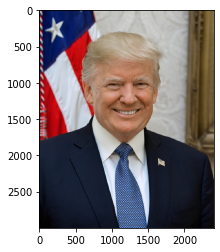

In [29]:
from PIL import Image
import matplotlib.pyplot as plt

img = plt.imread("f8d05506e9250de59fa645f0fb7020e4.jpg")
print("image shape: ", img.shape)
plt.imshow(img)

In [43]:
# convolution function

import numpy as np

def convolution(image, filter):
  # output size will be same as the input size
  img_output = np.zeros_like(image)
  print(img_output.shape)

  # zero padding to the input image
  img_padded = np.zeros((img.shape[0] + 2, img.shape[1] + 2, img.shape[2]))
  img_padded[1: -1, 1: -1] = img

  for i in range(img.shape[1]):
    for j in range(img.shape[0]):
      img_output[j, i] = np.sum(filter * img_padded[j: j + 3, i : i + 3, :])
  
  return img_output

(3000, 2405, 3)
total_time:  59.7481746673584
CPU times: user 59.6 s, sys: 301 ms, total: 59.9 s
Wall time: 59.9 s


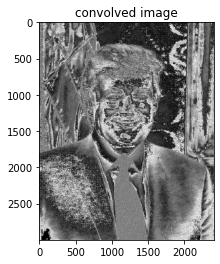

In [44]:
%%time

start_time = time.time()
filter = np.array([[[1, 0, -1], [1, 0, -1], [1, 0, -1]],
                   [[1, 0, -1], [1, 0, -1], [1, 0, -1]],
                   [[1, 0, -1], [1, 0, -1], [1, 0, -1]]])
img_result = convolution(img, filter)
total_time = time.time() - start_time

print("total_time: ", total_time)
plt.imshow(img_result)
plt.title("convolved image")

## b) using multi-processing

In [71]:
# convolution function, breaking the image into 2 parts horizontally from the middle

import numpy as np

def convolution(image):

  # defining the filter in the function
  filter = np.array([[[1, 0, -1], [1, 0, -1], [1, 0, -1]],
                   [[1, 0, -1], [1, 0, -1], [1, 0, -1]],
                   [[1, 0, -1], [1, 0, -1], [1, 0, -1]]])

  # output size will be same as the input size
  img_output = np.zeros_like(image)
  print(img_output.shape)

  # zero padding to the input image
  img_padded = np.zeros((img.shape[0] + 2, img.shape[1] + 2, img.shape[2]))
  img_padded[1: -1, 1: -1] = img

  for i in range(img.shape[1] - 3):
    for j in range(img.shape[0] - 3):
      img_output[j, i] = np.sum(filter * img_padded[j: j + 3, i : i + 3, :])
  
  return img_output

In [72]:
args = [img[:, :img.shape[1] // 2, :], img[:, img.shape[1] // 2 + 1: , :]]
print(args[0].shape)

(3000, 1202, 3)


total_time:  3.6716461181640625e-05
CPU times: user 120 ms, sys: 134 ms, total: 253 ms
Wall time: 254 ms


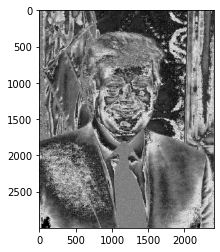

In [74]:
%%time

total_processes = 2
pool = multiprocessing.Pool(processes = total_processes)

# for i in range(total_processes):
#   args.append(list(words[start: end]))
#   start = end + 1
#   end += size // total_processes

args = [img[:, : img.shape[1] // 2, :], img[:, img.shape[1] // 2 + 1 : , :]]


start_time = time.time()
img_result = pool.map(convolution, args)
total_time = time.time() - start_time

print("total_time: ", total_time)
plt.imshow(img_result)